# Cohort 107 AUCs analysis 

### Imports and environment setup

- Date of run: 2024-10-04
- Environment: python 3.12
- Packages required: pandas, numpy, sklearn, statsmodels, seaborn, matplotlib

In [1]:
# Include in the environment the code directory with the utils function
import sys
sys.path.append('../code/')

In [2]:
# Library imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Utils imports
import cohort_analysis_utils as utils
import ms_utils

In [3]:
# Remove warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Remove cell printing limits
pd.set_option('display.max_rows', None)

# Data loading and preprosessing

For this analysis, we are going to work with the MS matrix ─located at ["data/ms/MS_verification_107.csv"](<../data/ms/MS_verification_107.csv>)─. For this dataset so far we have no metadata, just values for peptides and pathology condition for the 107 samples.

In [4]:
MS_107_PATH = "../data/ms/MS_validation_116.csv"

In [5]:
df_107 = pd.read_csv(MS_107_PATH, sep="\t", header=[0,1], index_col=0)

In [6]:
# Combine the names of headers at level 0 and 1 and make them the new headers
df_107.columns = ["_".join(filter(lambda x: x != '', col)).strip() for col in df_107.columns.values]


In [7]:
# Rename the column 0 to "Pathology" and make it categorical
df_107 = df_107.rename(columns={df_107.columns[0]: "Pathology"})
df_107['Pathology'] = df_107['Pathology'].apply(lambda x: 1 if x.startswith("T") else 0)

# Computing the models

In [8]:
# General parames
RESULTS_PATH = '../data/results/107_new'
BIOMARKERS_107 = df_107.columns[1:]
METHODS = ['direct']

In [9]:
# This is costly, so is commented out to compute it only once

models_107 = utils.compute_all_models_and_save(df=df_107, 
                                              biomarkers=BIOMARKERS_107, 
                                              target_col='Pathology', 
                                              methods=METHODS, 
                                              max_biomarker_count=1,
                                              folder_name=RESULTS_PATH,
                                              auc_threshold=0.0, 
                                              plot_rocs=True, 
                                              compute_auc_ci=True)

In [10]:
# Load the results
df_107_results_direct_max_1 = pd.read_csv(f'{RESULTS_PATH}/direct/max_1.csv', sep=',', index_col=0, header=0)
df_107_results_direct_max_1.head(10)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
LDHA_VTLTSEEEAR,0.90688,1.00000,0.02128,1.00000,0.60000,0.51515
LDHA_LVIITAGAR,0.90318,1.00000,0.02128,1.00000,0.60000,0.51515
KPYM_NTGIICTIGPASR,0.89701,1.00000,0.02128,1.00000,0.60000,0.51515
MMP9_AFALWSAVTPLTFTR,0.89023,0.97101,0.21277,0.83333,0.64423,0.50505
MMP9_SLGPALLLLQK,0.88853,0.95652,0.21277,0.76923,0.64078,0.50505
NAMPT_YDGHLPIEIK,0.88282,1.00000,0.21277,1.00000,0.65094,0.51515
SPIT1_SFVYGGCLGNK,0.88128,0.97101,0.12766,0.75000,0.62037,0.50505
CADH1_NLVQIK,0.87912,1.00000,0.02128,1.00000,0.60000,0.52525
SPIT1_WYYDPTEQICK,0.87327,0.97101,0.27660,0.86667,0.66337,0.52525


In [11]:
roc_csv_path = f"{RESULTS_PATH}/direct/max_1/rocs/MMP9_SLGPALLLLQK.csv"
roc_df = pd.read_csv(roc_csv_path, sep=',', index_col=0, header=0)
roc_df.tail(10)

,Sensitivity,Specificity,NPV,PPV
Threshold,,,,
0.563405,0.898551,0.659574,0.815789,0.794872
0.558760,0.927536,0.659574,0.861111,0.800000
0.557826,0.927536,0.638298,0.857143,0.790123
0.552643,0.942029,0.638298,0.882353,0.792683
0.544775,0.942029,0.531915,0.862069,0.747126
0.543155,0.956522,0.531915,0.892857,0.750000
0.535152,0.956522,0.489362,0.884615,0.733333
0.533067,0.956522,0.446809,0.875000,0.717391
0.504516,0.956522,0.191489,0.750000,0.634615


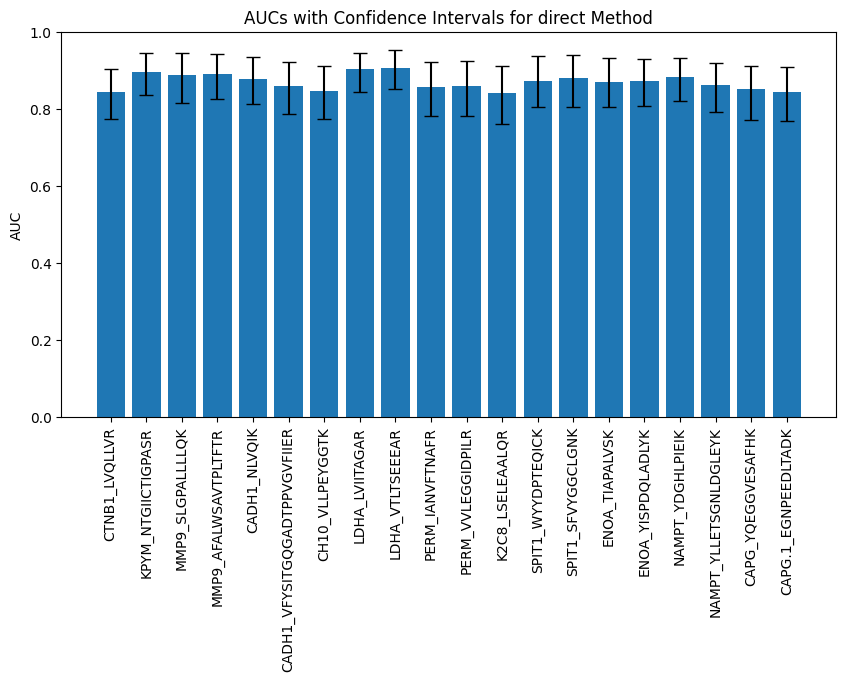

In [12]:
BIOMARKERS_107_cis = df_107_results_direct_max_1.head(20).index
utils.plot_aucs_with_confidence_intervals(models_107, 'direct', BIOMARKERS_107_cis)

In [13]:
BIOMARKERS_107_cis = df_107_results_direct_max_1.head(30).index
BIOMARKERS_high = []
for bmk in BIOMARKERS_107_cis:
    prot = bmk.split('_')[0]
    pep = bmk.split('_')[1]
    if prot not in  [p.split("_")[0] for p in BIOMARKERS_high]:
        BIOMARKERS_high.append(bmk)

In [15]:
_ = utils.compute_all_models_and_save(df=df_107, 
                                        biomarkers=BIOMARKERS_high, 
                                        target_col='Pathology', 
                                        methods=METHODS, 
                                        max_biomarker_count=2,
                                        folder_name=RESULTS_PATH,
                                        auc_threshold=0.5, 
                                        plot_rocs=True)

In [16]:
df_107_results_direct_max_2 = pd.read_csv(f'{RESULTS_PATH}/direct/max_2.csv', sep=',', index_col=0, header=0)
df_107_results_direct_max_2.head(10)

,Biomarker_2,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,,
MMP9_AFALWSAVTPLTFTR,CTNB1_LVQLLVR,0.93802,1.0,0.02128,1.0,0.60000,0.50505
PERM_VVLEGGIDPILR,CTNB1_LVQLLVR,0.93525,1.0,0.04255,1.0,0.60526,0.51515
MMP9_AFALWSAVTPLTFTR,CAPG_YQEGGVESAFHK,0.92538,1.0,0.02128,1.0,0.60000,0.50505
CADH1_NLVQIK,PERM_VVLEGGIDPILR,0.92384,1.0,0.02128,1.0,0.60000,0.51515
MMP9_AFALWSAVTPLTFTR,NAMPT_YDGHLPIEIK,0.92291,1.0,0.02128,1.0,0.60000,0.50505
NAMPT_YDGHLPIEIK,SPIT1_SFVYGGCLGNK,0.92168,1.0,0.10638,1.0,0.62162,0.51515
MMP9_AFALWSAVTPLTFTR,CH10_VLLPEYGGTK,0.91983,1.0,0.10638,1.0,0.62162,0.51515
MMP9_AFALWSAVTPLTFTR,CAPG.1_EGNPEEDLTADK,0.91983,1.0,0.04255,1.0,0.60526,0.51515
KPYM_NTGIICTIGPASR,CD44_TEAADLCK,0.91921,1.0,0.04255,1.0,0.60526,0.55556
